# TAR: Taller de Aprendizaje por Refuerzo 2025
# Laboratorio 0: Conceptos preeliminares  
En este laboratorio vamos a trabajar con un análisis básico de una marcha aleatoria (*random walk*) y de una cadena de markov. Nos servirá para repasar algunos conceptos básicos de probabildidad, matrices de transición, esperanza, y también para familiarizarnos -o recordar- cómo realizar scripts en python.



# 1. Random Walk y Probabilidades

En este ejercicio trabajaremos conceptos básicos de probabilidad y programación en Python usando **random walks** (caminatas aleatorias). Usaremos variables de tipo Bernoulli para decidir el movimiento del caminante.



**1.1 Random Walk en 1D**

Imaginemos un caminante que avanza por una grilla de una dimensión, y comienza en la posición 0. En cada paso lanza una moneda. Si sale cara, avanza una casilla; si sale cruz, retrocede una.

Simula una caminata de 100 pasos y grafica la trayectoria.

Repite para los casos donde en lugar de tirar una moneda (equiprobabilidad de avanzar o retroceder) tiene a) una probabilidad mayor a 0.5 de avanzar y b) una probabilidad menor a 0.5 de avanzar.

¿Qué observas?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(42)

# array para representar la caminata
## en la posicion i tiene la posicion despues de haberse movido i veces 
caminata = np.zeros(100)

for i in range(1,100):
    bernoulli = np.random.binomial(1,0.5)
    avanza = 2 * bernoulli - 1
    caminata[i] = caminata[i-1] + avanza

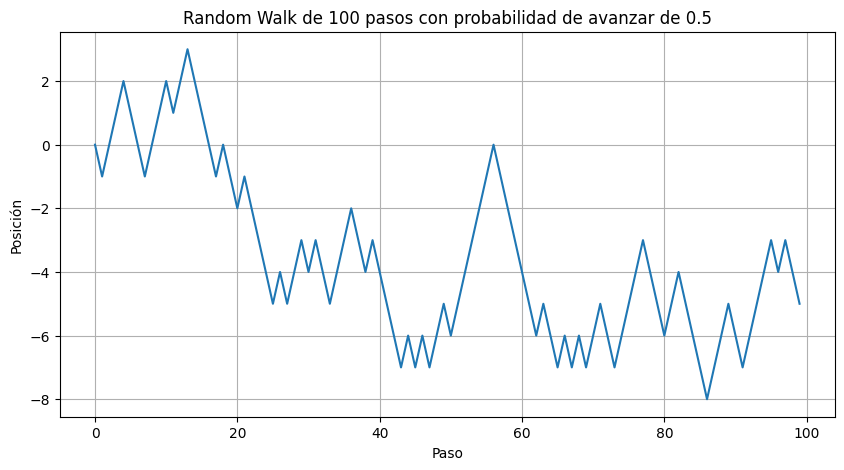

In [3]:
# Graficar el random walk
plt.figure(figsize=(10, 5))
plt.plot(caminata)
plt.title('Random Walk de 100 pasos con probabilidad de avanzar de 0.5')
plt.xlabel('Paso')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [4]:
np.random.seed(42)

# array para representar la caminata
## en la posicion i tiene la posicion despues de haberse movido i veces 
caminata_mayor_prob_de_avanzar = np.zeros(100)

for i in range(1,100):
    bernoulli = np.random.binomial(1,0.8)
    avanza = 2 * bernoulli - 1
    caminata_mayor_prob_de_avanzar[i] = caminata_mayor_prob_de_avanzar[i-1] + avanza

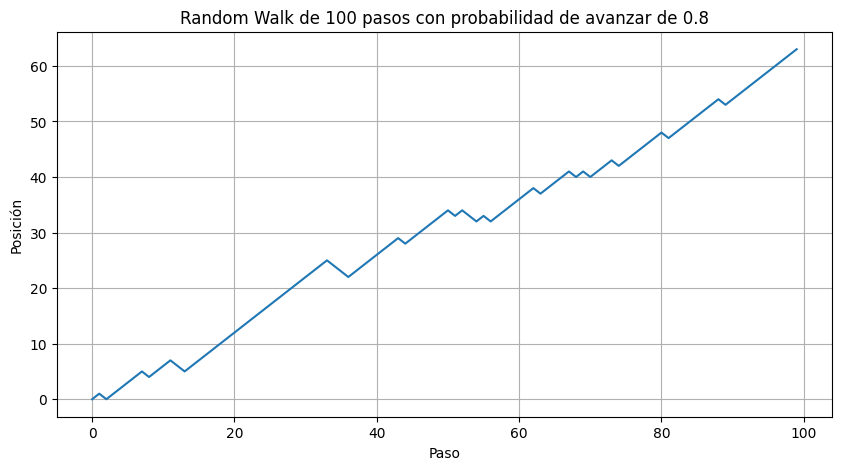

In [5]:
# Graficar el random walk
plt.figure(figsize=(10, 5))
plt.plot(caminata_mayor_prob_de_avanzar)
plt.title('Random Walk de 100 pasos con probabilidad de avanzar de 0.8')
plt.xlabel('Paso')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [6]:
np.random.seed(42)

# array para representar la caminata
## en la posicion i tiene la posicion despues de haberse movido i veces 
caminata_menor_prob_de_avanzar = np.zeros(100)

for i in range(1,100):
    bernoulli = np.random.binomial(1,0.2)
    avanza = 2 * bernoulli - 1
    caminata_menor_prob_de_avanzar[i] = caminata_menor_prob_de_avanzar[i-1] + avanza

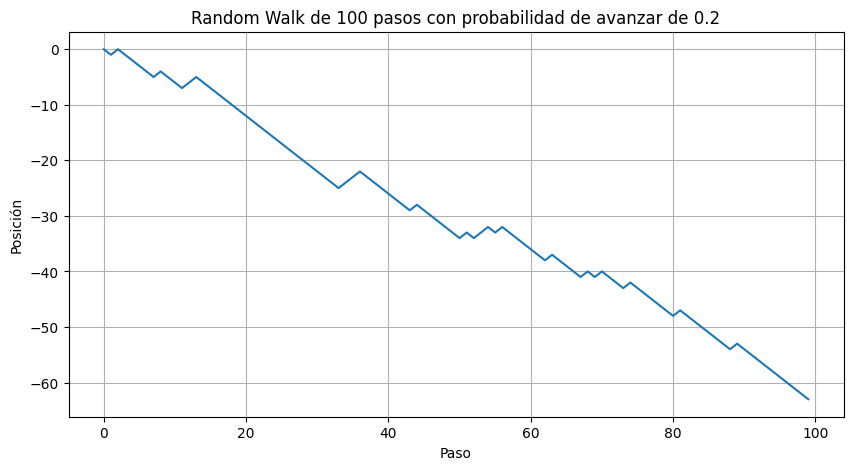

In [7]:
# Graficar el random walk
plt.figure(figsize=(10, 5))
plt.plot(caminata_menor_prob_de_avanzar)
plt.title('Random Walk de 100 pasos con probabilidad de avanzar de 0.2')
plt.xlabel('Paso')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

**Observaciones:** En las figuras anteriores se puede ver que cuando la probabilidad de avanzar es mayor a 0.5 tiene una tendencia media a avanzar, ya que termina en una posición mayor a la inicial, lo mismo pero al revés pasa con la probabilidad menor a 0.5. Y para el caso de equiprobabilidad, se observa que hay mayor incertidumbre sobre la posición final.

**1.2 Valor esperado de la posición final**

Considera ahora el caso de equiprobabilidad de avanzar o retroceder. Simula 1000 caminatas independientes de 1000 pasos cada una. Grafica utilizando un histograma, la distribución empírica de posiciones finales. ¿Cuál dirías que es el valor esperado de la posición final?

Repite para distintas cantidades de pasos. ¿Cómo cambia la varianza con la cantidad de pasos?

In [8]:
np.random.seed(42)

num_realizaciones = 1000   # cantidad de random walks a simular
num_pasos = 1000          # pasos en cada random walk

# Crear una lista para guardar cada random walk
random_walks = []

for _ in range(num_realizaciones):
    pasos = np.random.binomial(1,0.5,size=num_pasos-1)
    pasos = 2 * pasos - 1
    trayectoria = np.cumsum(pasos)                  
    random_walks.append(trayectoria)

# Convertir a DataFrame
df = pd.DataFrame(random_walks)

# Insertar una columna de ceros al principio
df.insert(0, 'Paso_0', 0)

df.columns = [f'Paso_{i}' for i in range(num_pasos)]

print(df)

     Paso_0  Paso_1  Paso_2  Paso_3  Paso_4  Paso_5  Paso_6  Paso_7  Paso_8  \
0         0      -1       0       1       2       1       0      -1       0   
1         0      -1      -2      -1       0       1       2       3       4   
2         0      -1      -2      -3      -4      -3      -4      -5      -4   
3         0      -1      -2      -1       0       1       0       1       2   
4         0      -1      -2      -1      -2      -1       0       1       0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995       0      -1       0      -1      -2      -3      -2      -3      -2   
996       0      -1      -2      -1      -2      -1      -2      -3      -4   
997       0       1       0       1       0       1       0       1       0   
998       0       1       0       1       0      -1       0      -1       0   
999       0       1       0       1       0       1       0       1       2   

     Paso_9  ...  Paso_990  Paso_991  Paso_992  Pas

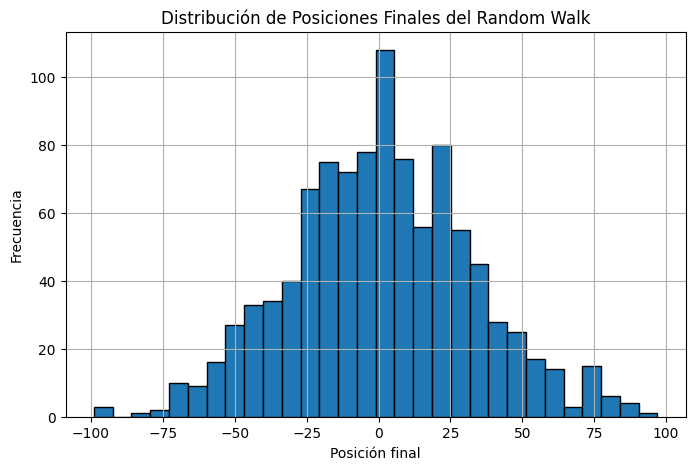

In [9]:
# El último valor en cada fila es la posición final
posiciones_finales = df.iloc[:, -1]

plt.figure(figsize=(8,5))
plt.hist(posiciones_finales, bins=30, edgecolor='black')
plt.title('Distribución de Posiciones Finales del Random Walk')
plt.xlabel('Posición final')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La esperanza del proceso de Random Walk se puede calcular como a continuación:

$$ E[X] = (1)\times p+(-1)\times(1-p) = (1)\times 0.5+(-1)\times(0.5) = 0$$

Y la varianza:

$$ var[X] = E[X^2]-E[X]^2 = (1^2)\times (0.5)+(-1^2)\times (0.5)=1$$

Para el caso de la posición final se tiene que la variable aleatoria que la represante es la suma de todas las posiciones desde $1$ hasta $n$.

$$ S_n = X_1 + X_2 + ... + X_n $$

$$ E[S] = E[X_1] + E[X_2] + ... + E[X_n] = 0  $$

Suponiendo pasos iid:
$$ var[S] = var[X_1] + var[X_2] + ... + var[X_n] = n = 1000$$ 

In [10]:
# Estadísticos calculados de manera teórica
print(f"El valor esperado de la posición final calculado de manera teórica es {0}")
print(f"El desvío estandar de la posición final calculado de manera teórica es: {np.sqrt(1000)}")

El valor esperado de la posición final calculado de manera teórica es 0
El desvío estandar de la posición final calculado de manera teórica es: 31.622776601683793


In [11]:
valor_esperado = posiciones_finales.mean()
print(f"El valor esperado de la posición final empírico es: {valor_esperado}")

desvio_estandar = posiciones_finales.std()
print(f"El desvío estandar de la posición final empírico es: {desvio_estandar}")

El valor esperado de la posición final empírico es: 1.016
El desvío estandar de la posición final empírico es: 31.622772549916363


In [12]:
def proceso_random_walk(num_realizaciones=1000,num_pasos=1000,probabilidad=0.5,semilla=None):
    if semilla is not None:
        np.random.seed(semilla)

    # Crear una lista para guardar cada random walk
    random_walks = []
    
    for _ in range(num_realizaciones):
        pasos = np.random.binomial(1,probabilidad,size=num_pasos-1)
        pasos = 2 * pasos - 1
        trayectoria = np.cumsum(pasos)                  
        random_walks.append(trayectoria)
    
    # Convertir a DataFrame
    df = pd.DataFrame(random_walks)
    
    # Insertar una columna de ceros al principio
    df.insert(0, 'Paso_0', 0)
    
    df.columns = [f'Paso_{i}' for i in range(num_pasos)]
    
    return df
    

La varianza de la variable aleatoria que representa la posición final del Random Walk es igual a la cantidad de pasos, así que si se aumenta la cantidad de pasos, entonces aumentará la varianza.

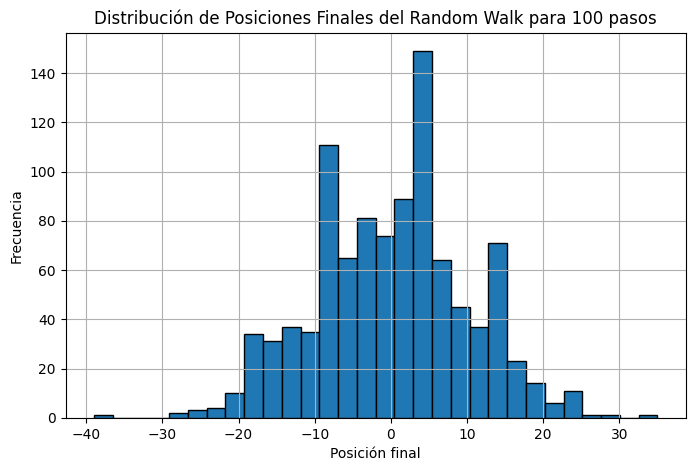

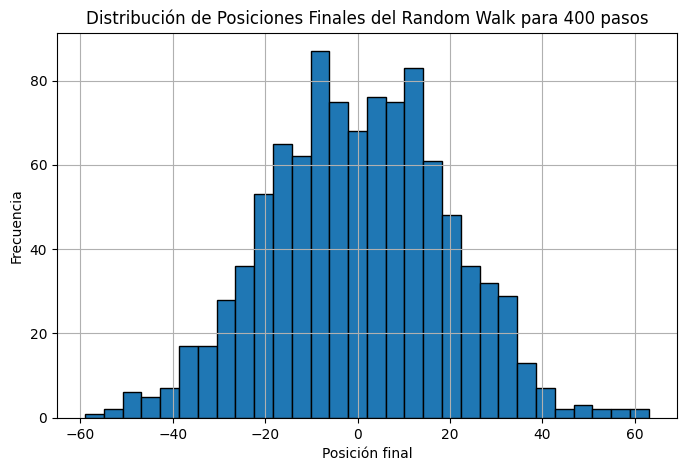

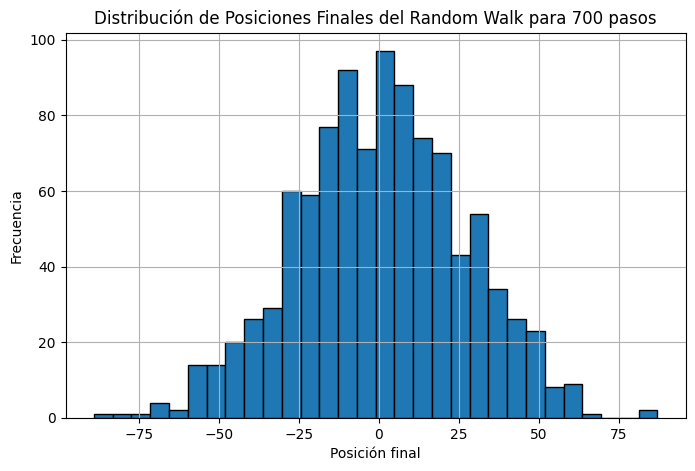

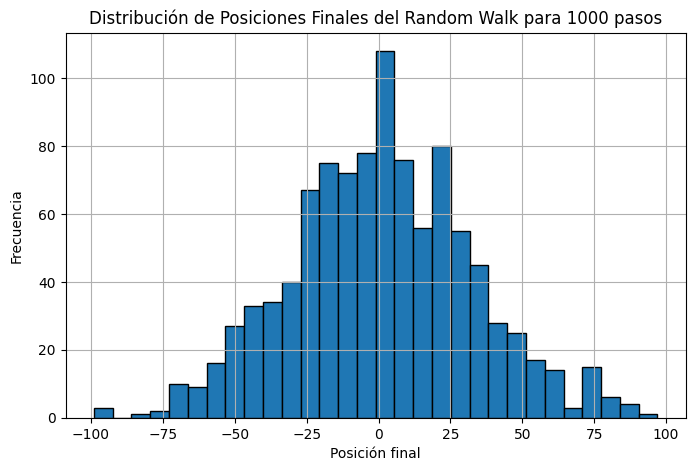

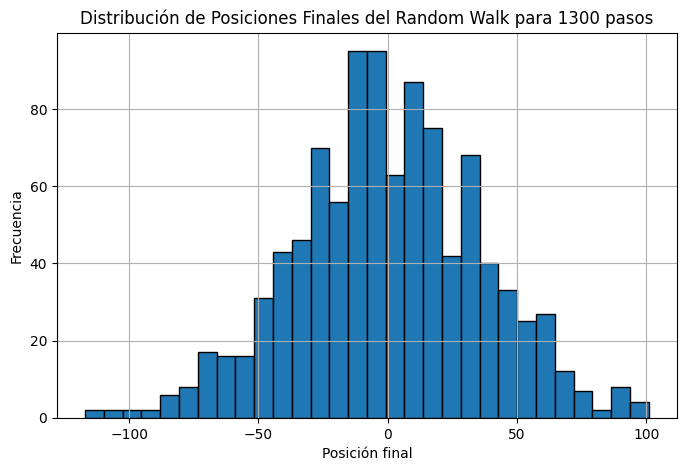

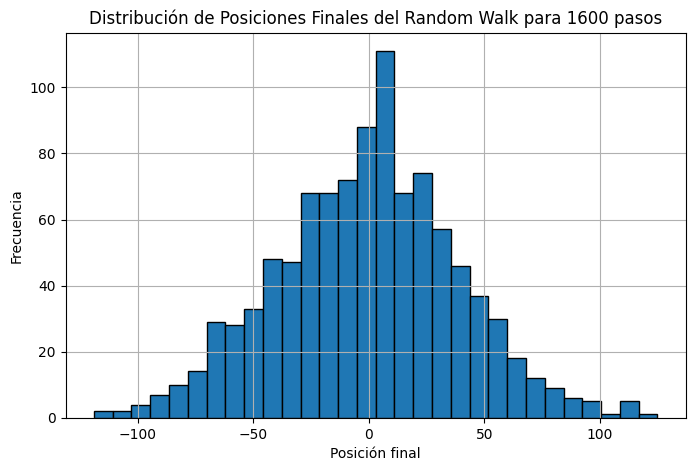

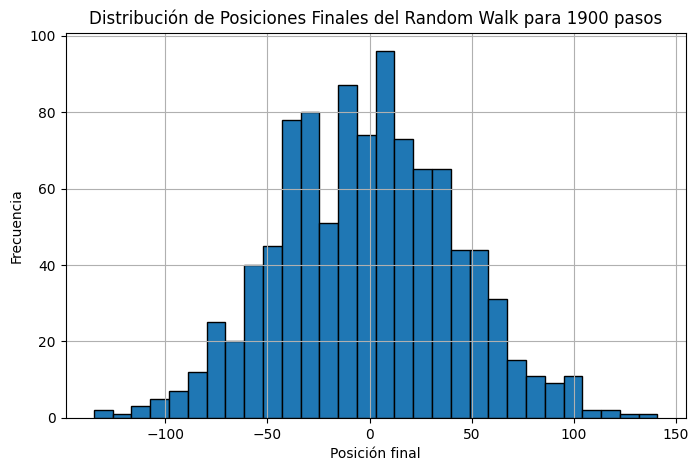

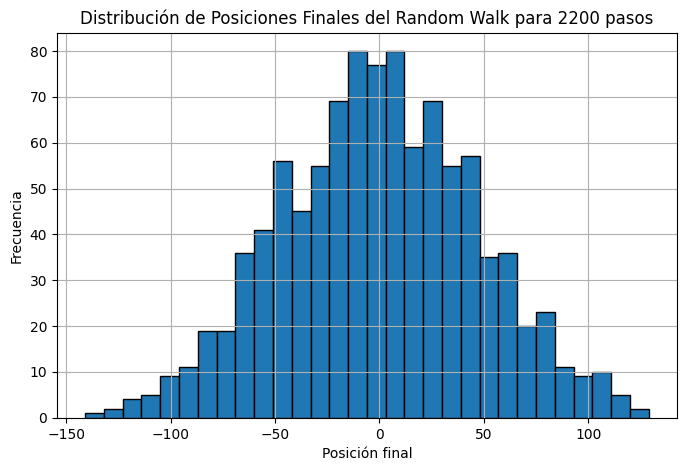

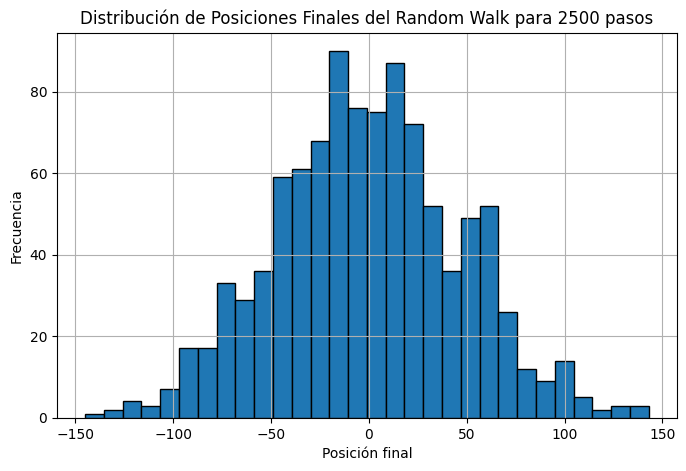

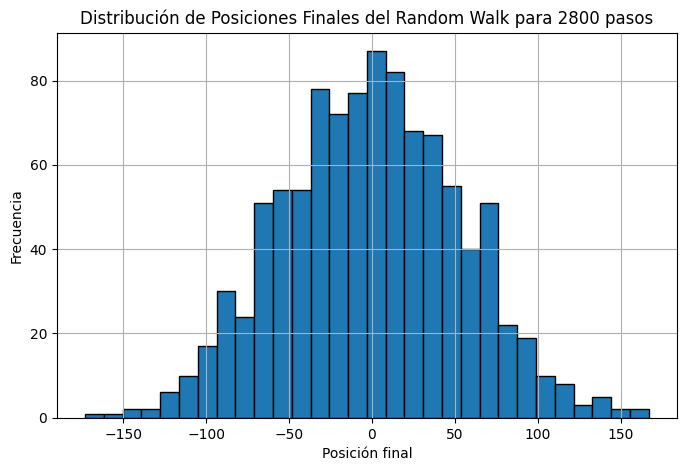

In [13]:
for pasos in range(100,3000,300):
    df = proceso_random_walk(num_realizaciones=1000,num_pasos=pasos,probabilidad=0.5,semilla=42)
    posiciones_finales = df.iloc[:, -1]
    plt.figure(figsize=(8,5))
    plt.hist(posiciones_finales, bins=30, edgecolor='black')
    plt.title(f'Distribución de Posiciones Finales del Random Walk para {pasos} pasos')
    plt.xlabel('Posición final')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

**1.3 Probabilidad condicional en caminatas aleatorias**

Vamos a calcular empíricamente la probabilidad condicional de un estado final dado un estado intermedio. Vamos también a recordar la definición de probabilidad condicional, y obtener el valor a partir de la misma.

Realizar 10000 simulaciones de caminatas aleatorias equiprobables de 10 pasos.

1. Registrar para cada caminata la posición en el paso 4 y la posición final.
2. Calcular empíricamente la probabilidad condicional de que la posición final sea positiva **dado que** la posición en el paso 4 fue 0.
3. Calcular la misma probabilidad pero utilizando directamente la definición de probabilidad condicional.
3. Calcular la probabilidad de terminar en una posición positiva (sin condicionar) y comparar con la probabilidad condicional obtenida previamente.

In [14]:
df = proceso_random_walk(num_realizaciones=1000,num_pasos=10,probabilidad=0.5,semilla=42)
posiciones_cuatro = df.iloc[:, 4]
posiciones_finales = df.iloc[:, -1]

In [15]:
df.head()

,Paso_0,Paso_1,Paso_2,Paso_3,Paso_4,Paso_5,Paso_6,Paso_7,Paso_8,Paso_9
0,0,-1,0,1,2,1,0,-1,0,1
1,0,1,0,1,2,1,0,-1,-2,-1
2,0,-1,-2,-1,-2,-3,-4,-5,-4,-5
3,0,1,2,1,2,1,0,1,2,3
4,0,-1,-2,-1,-2,-3,-4,-5,-4,-5


In [16]:
posiciones_cuatro

0      2
1      2
2     -2
3      2
4     -2
      ..
995    2
996    4
997   -2
998    2
999   -4
Name: Paso_4, Length: 1000, dtype: int64

In [17]:
posiciones_finales

0      1
1     -1
2     -5
3      3
4     -5
      ..
995    1
996    3
997    1
998    3
999   -3
Name: Paso_9, Length: 1000, dtype: int64

In [18]:
#  Calcular empíricamente la probabilidad condicional de que la posición final sea positiva dado que la posición en el paso 4 fue 0

prob_condicional_emp = len(np.where((posiciones_finales > 0) & (posiciones_cuatro == 0))[0]) / len(np.where(posiciones_cuatro == 0)[0])
prob_condicional_emp

0.46153846153846156

## Calcular la misma probabilidad pero utilizando directamente la definición de probabilidad 

prob_condicional_teo = 

$$ P(final > 0| paso 4 = 0) = \frac{P(final > 0, paso 4 = 0)}{P(paso 4 = 0)} $$ 

Para calcular la probabilidad de que en el paso 4 esté en la posición 0, tienen que haber salido dos +1 y dos -1. Además, hay combinaciones de 4 tomadas de a 2 posibles maneras de asignar los +1 (y los -1).

$$ P(paso 4 = 0) = \binom{4}{2}\times p^2 \times (1-p)^2 = \binom{4}{2}\times \frac{1}{2^4}$$

La probabilidad de terminar en una posición final positiva, teniendo en cuenta que en el paso 4 fue cero se puede calcular pensando que como hasta el paso 4 dio cero la posición, en lo que resta tiene que sumar positivo. Lo que queda se puede pensar como una caminata de 6 pasos en donde la cantidad de +1 puede ser 4, 5 o 6. 

Caso 4 +1:
$$\binom{6}{4}\times p^4 \times (1-p)^2 = \binom{6}{4}\times \frac{1}{2^6}$$

Caso 5 +1:
$$\binom{6}{5}\times p^5 \times (1-p)^1 = \binom{6}{5}\times \frac{1}{2^6}$$

Caso 6 +1:
$$\binom{6}{6}\times p^6 \times (1-p)^0 = \binom{6}{6}\times \frac{1}{2^6}$$

$$ P(final > 0, paso 4 = 0) = \binom{4}{2}\times \frac{1}{2^4} \times \frac{1}{2^6} (\binom{6}{4} + \binom{6}{5} + \binom{6}{6}) $$

Entonces:

$$ P(final > 0| paso 4 = 0) = \frac{1}{2^6} (\binom{6}{4} + \binom{6}{5} + \binom{6}{6}) $$ 

In [48]:
import math

def probabilidad_condicional_teorica():
    return (1/2**6)*(math.comb(6,4)+math.comb(6,5)+math.comb(6,6))

In [49]:
print("La probabilidad teórica de terminar en una posición final positiva, dado que en el paso 4 la posición fue cero es: ", probabilidad_condicional_teorica())

La probabilidad teórica de terminar en una posición final positiva, dado que en el paso 4 la posición fue cero es:  0.34375


## Calcular la probabilidad de terminar en una posición positiva (sin condicionar) y comparar con la probabilidad condicional obtenida previamente

### De manera empírica 

In [19]:
prob_posicion_final_positiva = len(np.where(posiciones_finales > 0)[0])/ len(df)
prob_posicion_final_positiva

0.474

### De manera teórica

$$ P(final > 0) = \sum_{k=6}^{10}\binom{10}{k}\times  p^k \times (1-p)^{10-k} = \sum_{k=6}^{10}\binom{10}{k}\times  \frac{1}{2^{10}}$$

In [52]:
import math

def probabilidad_sin_condicionar_teorica():
    prob = 0
    for k in range(6,11):
        sumando = math.comb(10,k)/(2**10)
        prob += sumando
    return prob

In [53]:
print("La probabilidad teórica de terminar en una posición final positiva es: ", probabilidad_sin_condicionar_teorica())

La probabilidad teórica de terminar en una posición final positiva es:  0.376953125


**Conclusión:** 
Como la probabilidad condicional de terminar en una posición positiva dado que en el paso 4 se estuvo en 0 es muy similar a la probabilidad no condicional, se concluye que el conocimiento de ese estado intermedio no cambia significativamente la predicción del resultado final. Esto sugiere una baja dependencia entre ambos eventos, aunque no implica independencia total del proceso.

**1.4 Random Walk en 2D**

En esta última parte del ejercicio 1 nos entrenaremos un poco más en scripts python. Supongamos ahora que el caminante puede moverse en las 4 direcciones (norte, sur, este, oeste) con igual probabilidad.

Simula una caminata de 200 pasos y grafica el resultado.

In [54]:
# Número de pasos
n_pasos = 200

# Posiciones iniciales
x = [0]
y = [0]

# Definir las direcciones posibles: (dx, dy)
direcciones = {
    'norte': (0, 1),
    'sur': (0, -1),
    'este': (1, 0),
    'oeste': (-1, 0)
}

# Lista de direcciones posibles
movimientos = list(direcciones.values())

# Simular la caminata
for _ in range(n_pasos):
    dx, dy = movimientos[np.random.randint(0, 4)]
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)

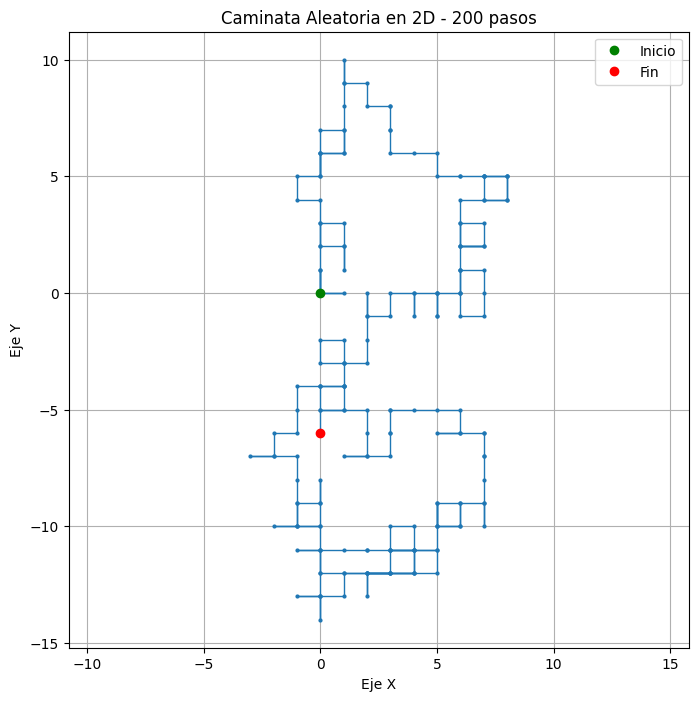

In [56]:
# Graficar la caminata
plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', markersize=2, linewidth=1)
plt.plot(0, 0, 'go', label='Inicio')        # punto de inicio
plt.plot(x[-1], y[-1], 'ro', label='Fin')   # punto final
plt.title('Caminata Aleatoria en 2D - 200 pasos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# 2. Ejemplo "Small World"

Vamos a trabajar con el ejemplo de "Small world" visto en clase. Vamos a considerar una cadena de markov de tiempo discreto cuyos **estados** y **transiciones** posibles entre los estados están representados en la imágen.

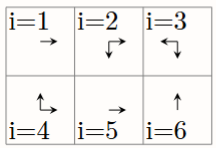

Las **probabilidades** son como sigue: a un instante dado, la probabilidad de quedarse en el mismo estado es de 0.5 y con probabilidad uniforme se mueve a un estado vecino.

1.   Primero vamos a ingresar manualmente la matriz.
2.   Luego se simulará una trayectoria.
3.   Finalmente se calculará y visualizará la distribución estacionaria.


**2.1 Diagrama de estados** Fuera del notebook dibuja a mano el diargrama de estados de la cadena. Investiga por qué se llama Small World el tipo de grafo resultante. Piensa la relación que hay entre este ejercicio y el ejercicio 1.

Respuesta:

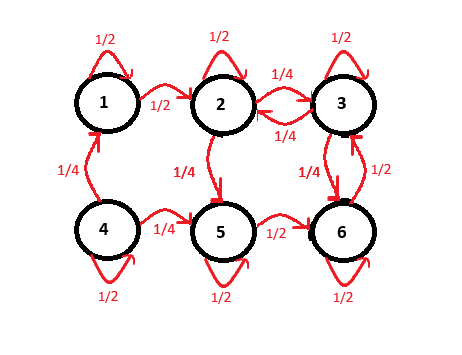

**Relación con el concepto "Small World":**

Un grafo Small World tiene dos propiedades:

* Alta agrupación local (nodos conectados con sus vecinos).

* Caminos cortos promedio entre cualquier par de nodos.

**Relación con el ejercicio 1:**

En el ejercicio 1 se trabajó sobre caminatas aleatorias, en particular en la parte *1.4* se simuló una caminata aleatoria en dos dimensiones (el caminante podía moverse hacia norte, sur, este u oeste con igual probabilidad). El random walk es un proceso de Markov con conjunto de estados infinito numerable, en este ejercicio se tiene una cadena de Markov con conjunto de estados finito. Los posibles movimientos son iguales que en el ejercicio 1, con la particularidad que en este caso, se puede volver sobre un mismo estado en un tiempo inmediatamente posterior y las probabilidades de moverse hacia estados vecinos no son siempre las mismas (a veces es 1/2 o 1/4). En el ejercicio 1, en cualquier coordenada del plano se podía ir a cualquier dirección, en cambio en este problema desde los estados no se puede ir a todas las direcciones. 

**2.2 Ingresa la matriz de transición como un array de NumPy**


In [63]:
P = np.array([[1/2,1/2,0,0,0,0],
            [0,1/2,1/4,0,1/4,0],
             [0,1/4,1/2,0,0,1/4],
             [1/4,0,0,1/2,1/4,0],
             [0,0,0,0,1/2,1/2],
             [0,0,1/2,0,0,1/2]])

P

array([[0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.25, 0.  , 0.25, 0.  ],
       [0.  , 0.25, 0.5 , 0.  , 0.  , 0.25],
       [0.25, 0.  , 0.  , 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.5 ]])

**2.3 Simula una trayectoria de la cadena de Markov** Utiliza las entradas correspondientes de la matriz P para sortear en cada paso el próximo estado. Guarda cada resultado en un vector trayectoria.

In [123]:
np.random.seed(42)

# TODO: completá la función para simular una cadena de Markov, donde P es la matriz de transición indicada anteriormente
def simular_cadena(P, pasos=20, estado_inicial=None):
    #TODO completar......
    trayectoria = np.zeros(pasos, dtype=int)

    if estado_inicial is not None:
        trayectoria[0] = estado_inicial

    for i in range(len(trayectoria)):
        # Me paro en la fila correspondiente a estado actual
        estado_actual = trayectoria[i]
        probs = P[estado_actual,:]
        
        # Con esa fila sorteo el siguiente estado 
        sorteo = np.random.choice(np.arange(P.shape[0]), p=probs)

        # Si no llegué al último paso
        if i != len(trayectoria) - 1:
            # Ese siguiente estado lo guardo en trayectoria[i+1] si i no es el estado final
            trayectoria[i+1] = sorteo

    return trayectoria

# Simular un recorrido de 100 pasos
trayectoria = simular_cadena(P, pasos=100)
print("Recorrido simulado:", trayectoria)


Recorrido simulado: [0 0 1 2 2 1 1 1 4 5 5 2 5 5 2 1 1 1 2 2 2 2 1 1 1 1 4 4 5 5 2 2 1 1 4 5 5
 2 1 2 2 1 1 1 4 4 5 2 2 2 1 4 5 5 5 5 5 2 1 1 1 1 1 4 4 4 5 2 5 2 5 5 2 1
 4 5 5 5 2 2 1 4 5 2 1 1 1 2 2 5 2 1 2 5 5 5 2 2 2 1]


In [126]:
trayectoria += 1
trayectoria

array([1, 1, 2, 3, 3, 2, 2, 2, 5, 6, 6, 3, 6, 6, 3, 2, 2, 2, 3, 3, 3, 3,
       2, 2, 2, 2, 5, 5, 6, 6, 3, 3, 2, 2, 5, 6, 6, 3, 2, 3, 3, 2, 2, 2,
       5, 5, 6, 3, 3, 3, 2, 5, 6, 6, 6, 6, 6, 3, 2, 2, 2, 2, 2, 5, 5, 5,
       6, 3, 6, 3, 6, 6, 3, 2, 5, 6, 6, 6, 3, 3, 2, 5, 6, 3, 2, 2, 2, 3,
       3, 6, 3, 2, 3, 6, 6, 6, 3, 3, 3, 2])

**2.4 Grafica la trayectoria obtenida**

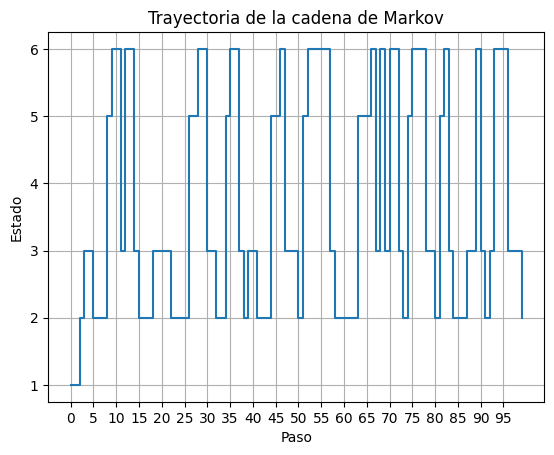

In [132]:
plt.step(range(len(trayectoria)), trayectoria, where='post')
plt.xlabel("Paso")
plt.ylabel("Estado")
plt.title("Trayectoria de la cadena de Markov")
plt.xticks(np.arange(0, len(trayectoria), 5))
plt.yticks(np.arange(P.shape[0])+1)
plt.grid(True)
plt.show()

**2.5 Calcula empíricamente el porcentaje de tiempo que la cadena estuvo en cada uno de los estados, según la trayectoria obtenida.** ¿cómo puede interpretarse los valores obtenidos? ¿cómo cambian a medida que aumentamos la cantidad de pasos simulada en 2.3 para la trayectoria? ¿y con respecto al estado inicial?

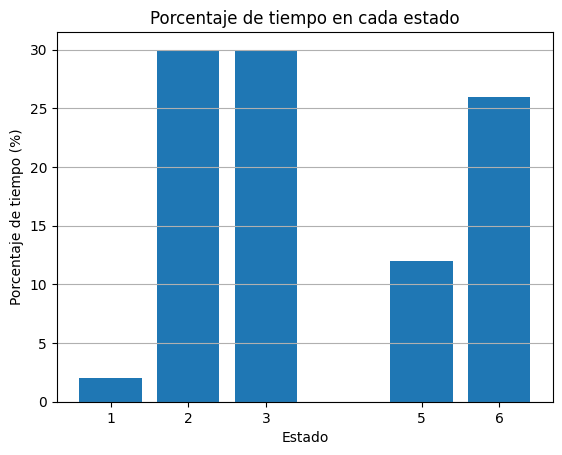

In [135]:
valores, frecuencias = np.unique(trayectoria, return_counts=True)
porcentajes = frecuencias / len(trayectoria) * 100

plt.bar(valores, porcentajes)
plt.xlabel("Estado")
plt.ylabel("Porcentaje de tiempo (%)")
plt.title("Porcentaje de tiempo en cada estado")
plt.xticks(valores)
plt.grid(axis='y')
plt.show()

**Interpretación:**

Estados 2, 3 y 6 tienen mayor grado (más conexiones) o mayor probabilidad de quedarse:

* Estado 2 tiene transiciones desde y hacia 1, 3, 5, y también 1/2 de quedarse.
* Estado 3 recibe desde 2 y 6, y también se queda con 1/2.
* Estado 6 recibe desde 3 y 5, también tiene 1/2 de quedarse.

Entonces, es esperable que estos tengan mayor frecuencia de visita.

* Estado 1 tiene menos conexiones y sale rápidamente. No hay transiciones entrantes desde otros estados (excepto 4). Difícil de alcanzar nuevamente una vez salido, poca frecuencia.

* Estado 5: Aunque está en el "centro", tiene igual probabilidad de ir a cualquier lado, pero no tiene un gran bucle de retención. Su probabilidad de permanecer es 1/2, igual que el resto, pero sus entradas no son especialmente altas. Tiene una frecuencia media o algo baja.

* Estado 4: Nadie va a este estado, se puede ver en la columna 4 de la matriz $P$ (que son todos ceros, excepto en la fila 4 que es 1/2) y en el diagrama de estados que ninguna flecha llega a él.

**Cómo cambian a medida que se aumentan la cantidad de pasos simulados:**

Los porcentajes de tiempo en cada estado se estabilizan. Se acercan a la distribución estacionaria teórica. Estados como 2, 3 y 6 seguirán dominando si el sistema empieza desde cualquier estado.

**2.6 Obten y grafica la evolución en el tiempo de una distribución inicial dada.** Utiliza la propiedad vista en clase respecto a matrices estocásticas. Analiza el resultado y observa si la distribución convergió o no. Prueba varias veces, con distintas distribuciones iniciales. ¿Qué observas? ¿Por qué?

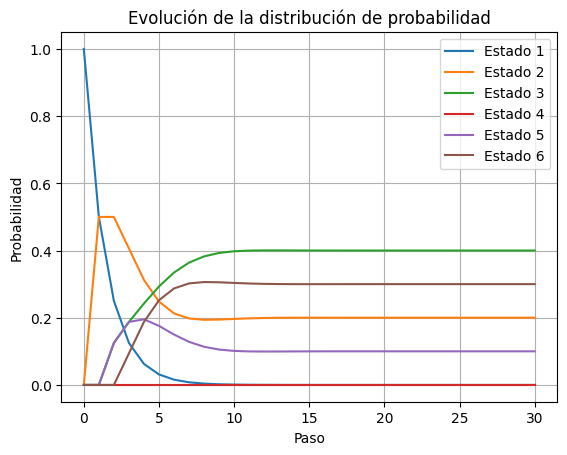

In [143]:
# TODO: simulá la evolución con el tiempo de una distribución inicial

# Distribución inicial: empieza en estado 1 (índice 0)
pi0 = np.zeros(6)
pi0[0] = 1.0  # 100% de probabilidad en estado 1

# Guardar evolución
T = 30  # cantidad de pasos
evolucion = [pi0]

pi = pi0.copy()
for _ in range(T):
    pi = pi @ P  # siguiente distribución
    evolucion.append(pi)

evolucion = np.array(evolucion)  # (T+1, 6)

# Graficar
for i in range(6):
    plt.plot(evolucion[:, i], label=f"Estado {i+1}")

plt.xlabel("Paso")
plt.ylabel("Probabilidad")
plt.title("Evolución de la distribución de probabilidad")
plt.legend()
plt.grid(True)
plt.show()




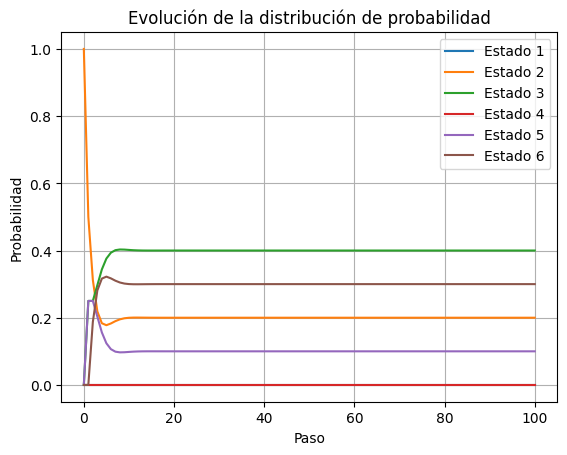

In [141]:
# TODO: simulá la evolución con el tiempo de una distribución inicial

# Distribución inicial: empieza en estado 2 (índice 1)
pi0 = np.zeros(6)
pi0[1] = 1.0  # 100% de probabilidad en estado 2

# Guardar evolución
T = 100  # cantidad de pasos
evolucion = [pi0]

pi = pi0.copy()
for _ in range(T):
    pi = pi @ P  # siguiente distribución
    evolucion.append(pi)

evolucion = np.array(evolucion)  # (T+1, 6)

# Graficar
for i in range(6):
    plt.plot(evolucion[:, i], label=f"Estado {i+1}")

plt.xlabel("Paso")
plt.ylabel("Probabilidad")
plt.title("Evolución de la distribución de probabilidad")
plt.legend()
plt.grid(True)
plt.show()




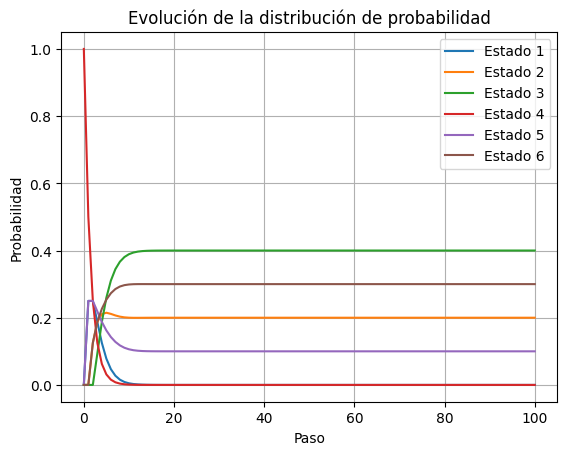

In [144]:
# TODO: simulá la evolución con el tiempo de una distribución inicial

# Distribución inicial: empieza en estado 4 (índice 3)
pi0 = np.zeros(6)
pi0[3] = 1.0  # 100% de probabilidad en estado 4

# Guardar evolución
T = 100  # cantidad de pasos
evolucion = [pi0]

pi = pi0.copy()
for _ in range(T):
    pi = pi @ P  # siguiente distribución
    evolucion.append(pi)

evolucion = np.array(evolucion)  # (T+1, 6)

# Graficar
for i in range(6):
    plt.plot(evolucion[:, i], label=f"Estado {i+1}")

plt.xlabel("Paso")
plt.ylabel("Probabilidad")
plt.title("Evolución de la distribución de probabilidad")
plt.legend()
plt.grid(True)
plt.show()




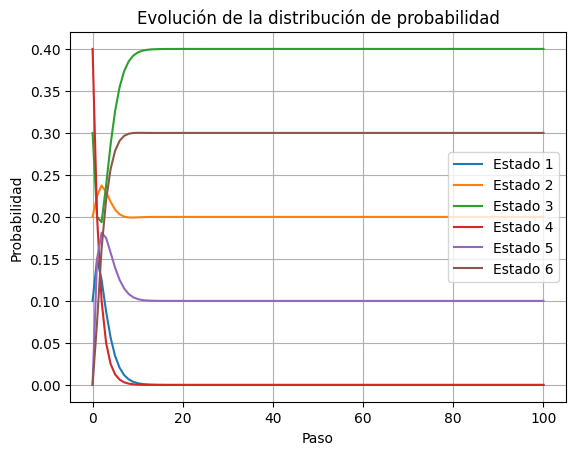

In [145]:
# TODO: simulá la evolución con el tiempo de una distribución inicial

# Distribución inicial: empieza en estado 4 (índice 3)
pi0 = np.array([0.1,0.2,0.3,0.4,0,0])

# Guardar evolución
T = 100  # cantidad de pasos
evolucion = [pi0]

pi = pi0.copy()
for _ in range(T):
    pi = pi @ P  # siguiente distribución
    evolucion.append(pi)

evolucion = np.array(evolucion)  # (T+1, 6)

# Graficar
for i in range(6):
    plt.plot(evolucion[:, i], label=f"Estado {i+1}")

plt.xlabel("Paso")
plt.ylabel("Probabilidad")
plt.title("Evolución de la distribución de probabilidad")
plt.legend()
plt.grid(True)
plt.show()




**Conclusiones:**

En las gráficas anteriores se observa que hay convergencia a una distribución estacionaria, a partir de cierto paso se estabilizan las curvas de probabilidad para cada estado y dejan de cambiar. Además, independientemente de cuál sea la distribución inicial, las curvas convergen siempre al mismo valor en cada caso.

**2.7 Obten la distribución estacionaria a partir de un cálculo algebraico, y no una simulación (Estamos asumiendo que la misma existe.).**  Utiliza las propiedades vistas en clase. Compara el resultado con lo graficado anteriormente, ¿qué concluyes? Compara también el resultado con el obtenido en 2.3.

Sea $\boldsymbol{\pi} = (\pi_1, \pi_2, \pi_3, \pi_4, \pi_5, \pi_6)$ la distribución estacionaria. Queremos resolver:

$$
\boldsymbol{\pi} P = \boldsymbol{\pi}, \quad \text{con} \quad \sum_{i=1}^{6} \pi_i = 1
$$

Es decir, el siguiente sistema de ecuaciones:

$$
\begin{cases}
\pi_1 = 0.5\pi_1 + 0.25\pi_2 + 0.25\pi_4 \\
\pi_2 = 0.5\pi_1 + 0.5\pi_2 + 0.25\pi_3 \\
\pi_3 = 0.25\pi_2 + 0.5\pi_3 + 0.25\pi_6 \\
\pi_4 = 0.25\pi_1 + 0.5\pi_4 \\
\pi_5 = 0.25\pi_4 + 0.5\pi_5 \\
\pi_6 = 0.25\pi_3 + 0.5\pi_6 + 0.25\pi_5 \\
\pi_1 + \pi_2 + \pi_3 + \pi_4 + \pi_5 + \pi_6 = 1
\end{cases}
$$


In [150]:
A = P.T - np.eye(6)

A = np.vstack([A, np.ones(6)])
b = np.zeros(6)
b = np.append(b, 1)

# Resolvemos el sistema
pi_estacionaria = np.linalg.lstsq(A, b, rcond=None)[0]

# Mostrar resultado
print("Distribución estacionaria:")
for i, p in enumerate(pi_estacionaria):
    print(f"Estado {i+1}: {p:.2f}")


Distribución estacionaria:
Estado 1: 0.00
Estado 2: 0.20
Estado 3: 0.40
Estado 4: 0.00
Estado 5: 0.10
Estado 6: 0.30


$\pi=(0.00, 0.20, 0.40, 0.00, 0.10, 0.30)$

**Interpretación:**

* Los estados 3, 6 y 2 son los que más peso tienen a largo plazo. 
* Estados 1 y 4 tienen probabilidad cero en la distribución estacionaria. Esto ocurre porque, aunque forman parte de la cadena, son difíciles de alcanzar nuevamente una vez que se sale de ellos.
* La distribución estacionaria coincide con el comportamiento empírico observado. El sistema converge hacia ella, sin importar el estado inicial.